# K-means clustering

This notebook was created for a homework assignment in MSBA Machine Learning 1.

The k-means algorithm implemented here is executed on the MNIST digits dataset.

## Imports

In [1]:
import numpy as np
import numpy.linalg
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

## Define functions

In [2]:
# Calculate squared distance from a point x to each centroid
def distance(x, c):
    dist = ((x - c)**2).sum(axis=1)
    return dist

In [3]:
# Update the cluster_assignments vector so that each point x is assigned to the cluster with the closest centroid
def reassign_clusters(data, centroids):
    num_examples = data.shape[0]
    cluster_assignments = np.zeros(num_examples)
    i = 0
    for x in data:
        cluster_assignments[i] = distance(x, centroids).argmin()
        i += 1
    return cluster_assignments

In [4]:
# Update the centroids to be the average of all points in the cluster
def update_centroids(cluster_assignments, centroids):
    k = centroids.shape[0]
    for j in range(k):
        cluster_points = data[cluster_assignments == j]
        centroids[j] = cluster_points.mean(axis=0)
    return centroids

In [5]:
# Calculate "loss" at the end of the training round
def calculate_loss(data, cluster_assignments, centroids):
    num_examples = data.shape[0]
    loss = np.zeros(num_examples)
    for c in range(centroids.shape[0]):
        loss[cluster_assignments == c] = np.linalg.norm(data[cluster_assignments == c] - centroids[c], axis=1)
    return np.mean(np.square(loss))

In [6]:
# Assign data to k clusters, stopping at max_rounds if not convereged yet
def kmeans(data, k, max_rounds):
    num_examples = data.shape[0]
    num_features = data.shape[1]
    
    initial_centroids = np.random.choice(num_examples, k, replace=False)
    centroids = data[initial_centroids]

    max_epochs = max_rounds
    l = None
    for epoch in range(max_epochs):
        print("epoch:",epoch)
        prev_l = l
        cluster_assignments = reassign_clusters(data, centroids)
        centroids = update_centroids(cluster_assignments, centroids)
        l = calculate_loss(data, cluster_assignments, centroids)
        print("loss:",l)
        if (prev_l != None and l == prev_l):
            # break if loss is not lowered
            break
            
    return (cluster_assignments, centroids)

## Execute k-means

In [7]:
digits = load_digits()
data = digits.data

In [8]:
cluster_assignments, centroids = kmeans(data, 5, 40)

epoch: 0
loss: 953.9079770338533
epoch: 1
loss: 887.6359338672706
epoch: 2
loss: 866.1795614835628
epoch: 3
loss: 859.2439270885656
epoch: 4
loss: 852.895501416096
epoch: 5
loss: 849.3784241233508
epoch: 6
loss: 847.966285302417
epoch: 7
loss: 847.0043385800245
epoch: 8
loss: 846.398378039405
epoch: 9
loss: 846.248391178659
epoch: 10
loss: 846.1645342803437
epoch: 11
loss: 846.0999383746404
epoch: 12
loss: 846.0533811015623
epoch: 13
loss: 846.0495898905269
epoch: 14
loss: 846.0453175115455
epoch: 15
loss: 846.0418780066318
epoch: 16
loss: 846.0371497330196
epoch: 17
loss: 846.0356311668855
epoch: 18
loss: 846.0356311668855


In [19]:
cluster_assignments, centroids = kmeans(data, 10, 40)

epoch: 0
loss: 835.152660666681
epoch: 1
loss: 756.5285823718793
epoch: 2
loss: 722.9941585264218
epoch: 3
loss: 713.2540896745263
epoch: 4
loss: 707.8660326449601
epoch: 5
loss: 704.6209530379816
epoch: 6
loss: 702.7385809134195
epoch: 7
loss: 699.2376448941247
epoch: 8
loss: 690.5289848092704
epoch: 9
loss: 684.1172712688082
epoch: 10
loss: 679.5195589531735
epoch: 11
loss: 675.9393412710039
epoch: 12
loss: 674.2960880451338
epoch: 13
loss: 673.3322976480154
epoch: 14
loss: 672.4192319350335
epoch: 15
loss: 671.5300815796072
epoch: 16
loss: 671.3946663481901
epoch: 17
loss: 671.3699141940515
epoch: 18
loss: 671.3373050416595
epoch: 19
loss: 671.3373050416595


In [20]:
cluster_assignments, centroids = kmeans(data, 15, 40)

epoch: 0
loss: 713.935729852928
epoch: 1
loss: 645.4927638843812
epoch: 2
loss: 619.1903624658139
epoch: 3
loss: 603.5632667688828
epoch: 4
loss: 594.653224582907
epoch: 5
loss: 590.0896315496152
epoch: 6
loss: 588.2303755855896
epoch: 7
loss: 587.2739315536262
epoch: 8
loss: 586.8082237187402
epoch: 9
loss: 586.4107632596225
epoch: 10
loss: 585.6381244202188
epoch: 11
loss: 585.2528518132345
epoch: 12
loss: 584.840667160878
epoch: 13
loss: 584.4488556935655
epoch: 14
loss: 584.2484506422983
epoch: 15
loss: 584.1605852863881
epoch: 16
loss: 584.0590147173345
epoch: 17
loss: 583.9990675623831
epoch: 18
loss: 583.9311425430424
epoch: 19
loss: 583.7938910212262
epoch: 20
loss: 583.7632324817454
epoch: 21
loss: 583.674677102945
epoch: 22
loss: 583.5731954659356
epoch: 23
loss: 583.5597714271436
epoch: 24
loss: 583.5476249553461
epoch: 25
loss: 583.5476249553461


Below is code to sanity check that the images in the first few clusters are the same.

<Figure size 432x288 with 0 Axes>

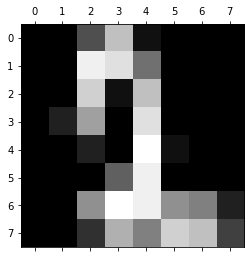

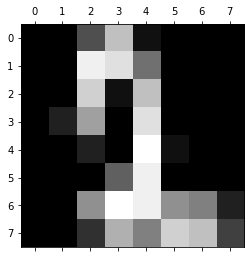

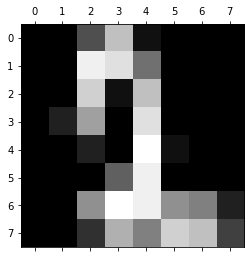

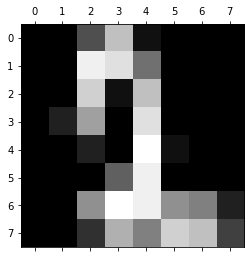

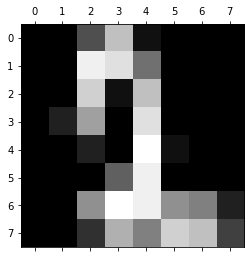

In [15]:
i = 0
k_i = digits.images[cluster_assignments == i]

plt.gray() 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.show() 

<Figure size 432x288 with 0 Axes>

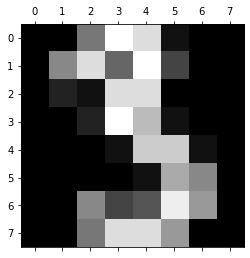

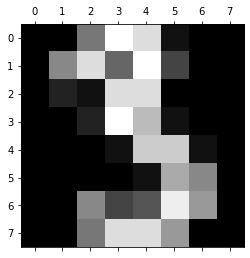

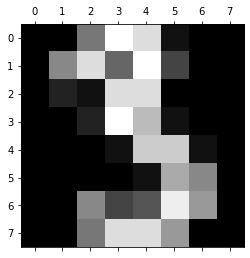

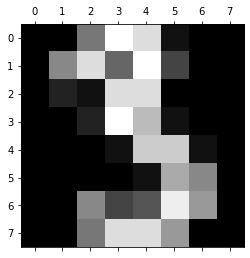

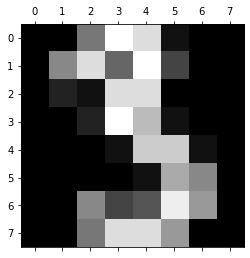

In [16]:
i = 1
k_i = digits.images[cluster_assignments == i]

plt.gray() 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.show() 

<Figure size 432x288 with 0 Axes>

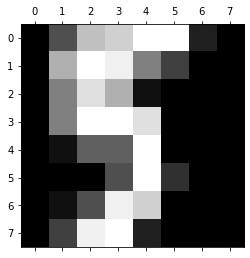

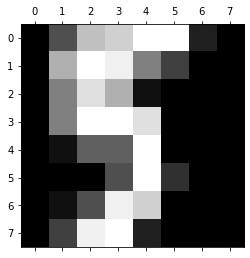

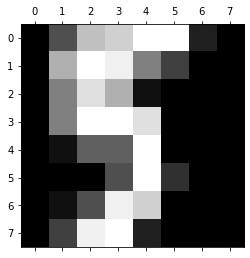

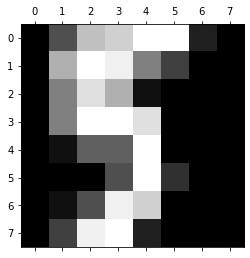

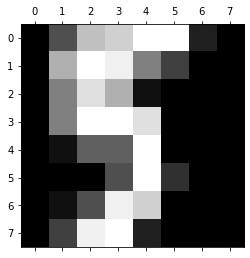

In [17]:
i = 2
k_i = digits.images[cluster_assignments == i]

plt.gray() 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.matshow(k_i[0]) 
plt.show() 